# Reproducing the paper and extension to new data.

In [37]:
from src.methods import *

import matplotlib.pyplot as plt
from numpy.random import default_rng

rng = default_rng()

## 1. Reproducing the paper

### A) Noisy Henon dataset

In [38]:
n = 1200
d = 4

indep_Gn = rng.standard_normal((n,d))
params_henon = {'d': 4,
          'b': np.array([0.285, 0.29, 0.295, 0.30]),
          'sigma': 0.1,
          'x0': 1.4,
          'y0': 1,
          'n': 1200
          }

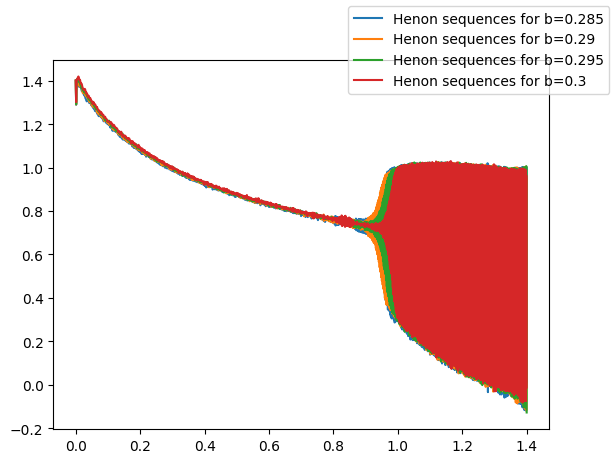

In [39]:
fig, ax = plt.subplots(ncols=1, nrows=1)
datas_Henon = NoisyHenon(**params_henon)
a_values, xs = datas_Henon.generate_data(indep_Gn)

for i in range(d):
    ax.plot(a_values, xs[:,i], label=f"Henon sequences for b={params_henon['b'][i]}")
fig.legend();

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


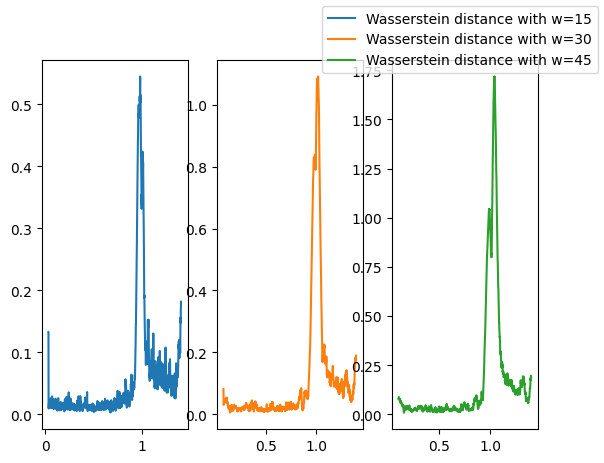

In [40]:
Ws = [15, 30, 45]

fig, ax = plt.subplots(ncols=len(Ws), nrows=1)

for (i, w) in enumerate(Ws):
    a_values, xs, wassertein_dists = datas_Henon.compute_wasserstein_distances(w, indep_Gn)
    ax[i].plot(a_values[2*w-1:], wassertein_dists, color=f'C{i}', label=f'Wasserstein distance with w={w}')

fig.legend();

In [41]:
data = datas_Henon.generate_data(indep_Gn, output_type='df')
params_henon_landscape = {'data': data,
          'k_homology_dimension': 120,
          'm_landscape': 5,
          'n_nodes': 1000,
          'memory_saving': (True, 1)
          }

Ws = [30, 40, 50]
w = 40
d1, l1, norms = datas_Henon.compute_landscapes(w_window_size=w, **params_henon_landscape)

Diagram Progress: 100%|██████████| 1160/1160 [00:03<00:00, 296.70it/s]


Call


Landscapes Progress: 100%|██████████| 1160/1160 [00:01<00:00, 911.31it/s] 


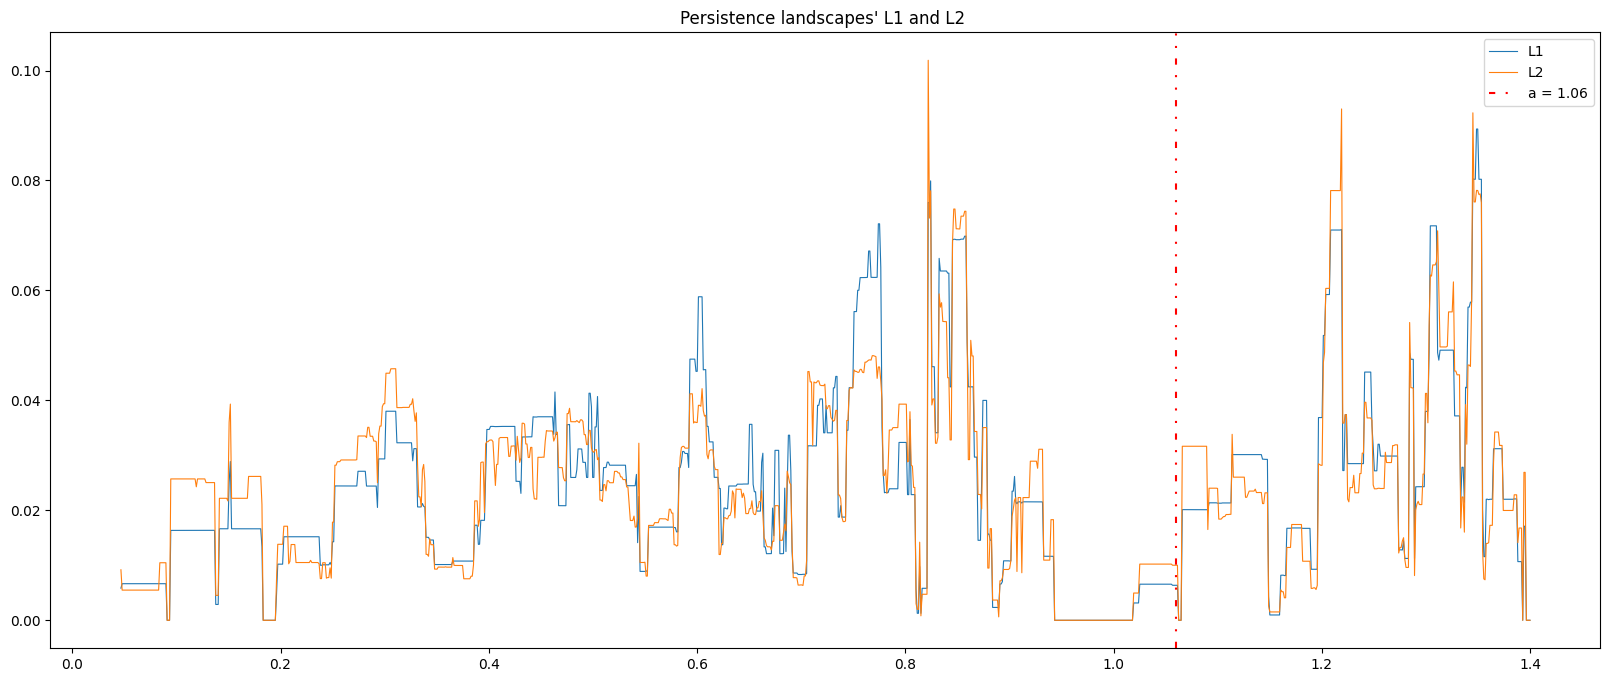

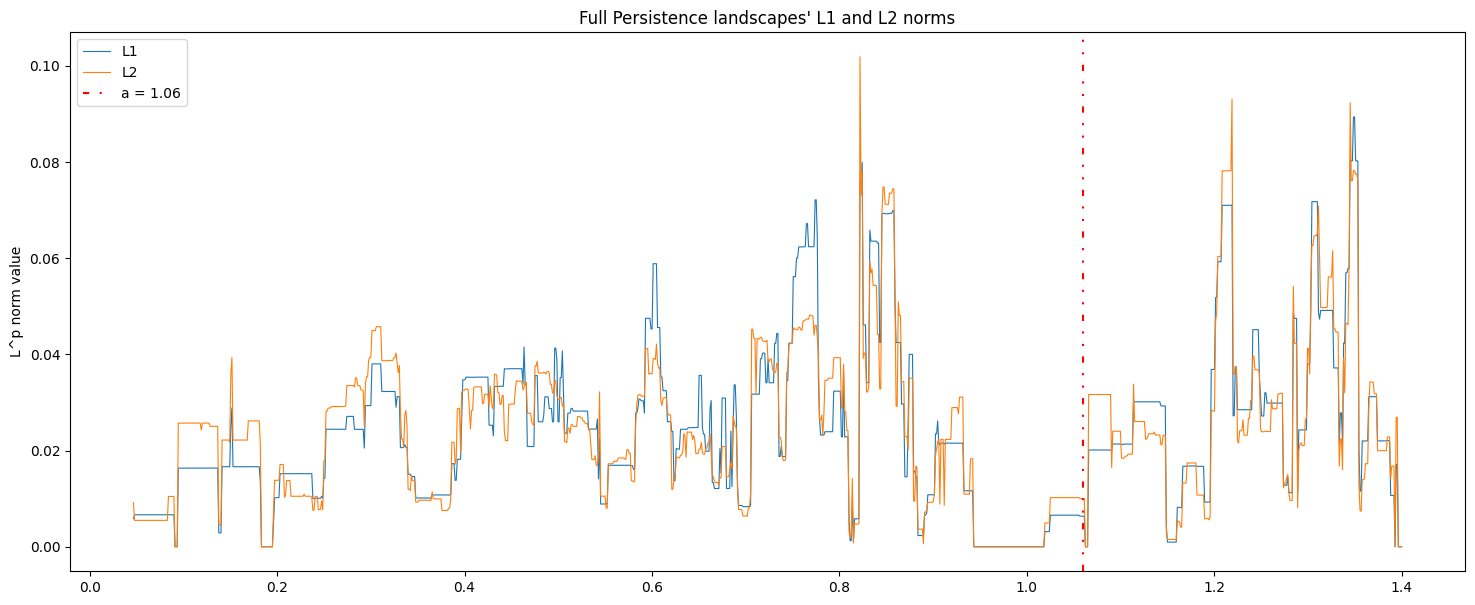

In [42]:
# Computes and print graph of dot-com bubble
df = pd.DataFrame(norms,
                  columns=["L1", "L2"],
                  index=a_values[w:])

ax = df.plot(figsize=(20, 8),
             lw=0.8,
             title="Persistence landscapes' L1 and L2 ")

ax.axvline(x=1.06,
           color='r',
           linestyle=(0, (3, 5, 1, 5, 1, 5)),
           label='a = 1.06')
ax.legend()
plt.show()

# Computes the full L1 and L2 time series plot
df = pd.DataFrame(norms,
                  columns=["L1", "L2"],
                  index=a_values[w:])

ax = df.plot(figsize=(18, 7),
             lw=0.8,
             ylabel="L^p norm value",
             title="Full Persistence landscapes' L1 and L2 norms")
ax.axvline(x=1.06,
           color='r',
           linestyle=(0, (3, 5, 1, 5, 1, 5)),
           label='a = 1.06')
ax.legend();

### B) White noise with gamma inverse variance

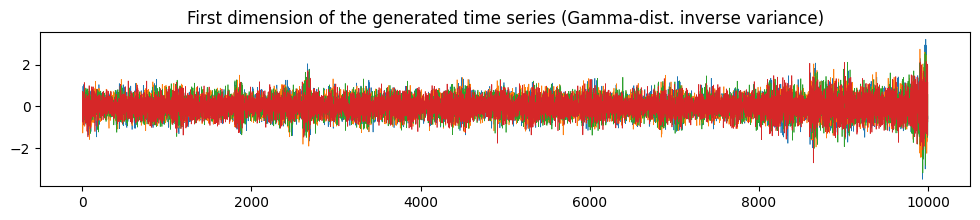

In [43]:
params_white = {'d': 4,
                'alpha': 8,
                'beta': 1}

data_white_noise = WhiteNoiseWithGammaVariance(**params_white)
white_noise = data_white_noise.generate_data()

plt.figure(figsize=(12, 2))
for i in range(4):
  plt.plot(white_noise[:,i], linewidth=0.5)
  plt.title("First dimension of the generated time series (Gamma-dist. inverse variance)")

In [44]:
white_noise = data_white_noise.generate_data(output_type='pd')

params_white_landscape = {'data': data,
          'k_homology_dimension': 40,
          'm_landscape': 5,
          'n_nodes': 1000,
          'memory_saving': (True, 1)
          }

Ws = [30, 40, 50]
w = 40
d1, l1, norms = datas_Henon.compute_landscapes(w_window_size=w, **params_white_landscape)

Diagram Progress:   0%|          | 0/1160 [00:00<?, ?it/s]

Diagram Progress: 100%|██████████| 1160/1160 [00:04<00:00, 281.50it/s]


Call


Landscapes Progress: 100%|██████████| 1160/1160 [00:01<00:00, 961.28it/s]


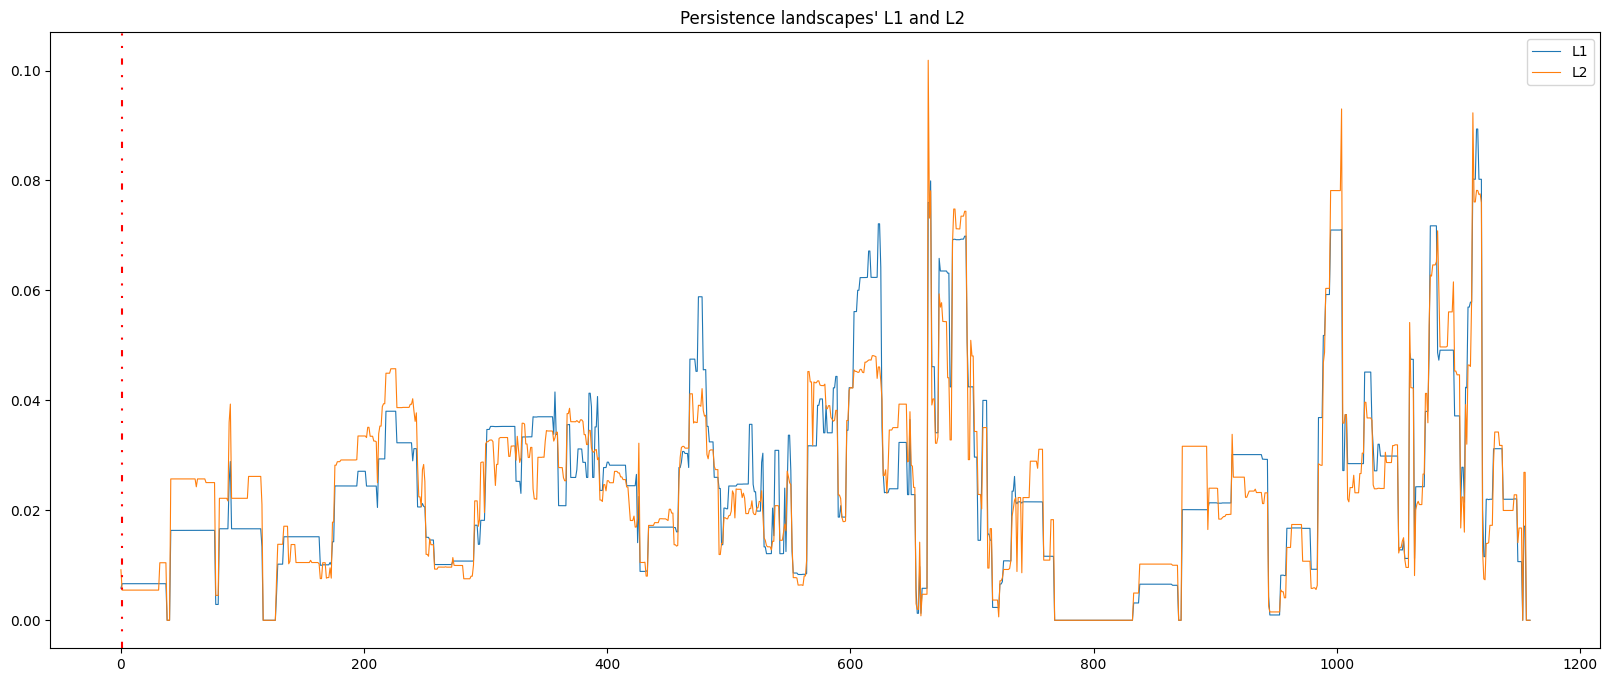

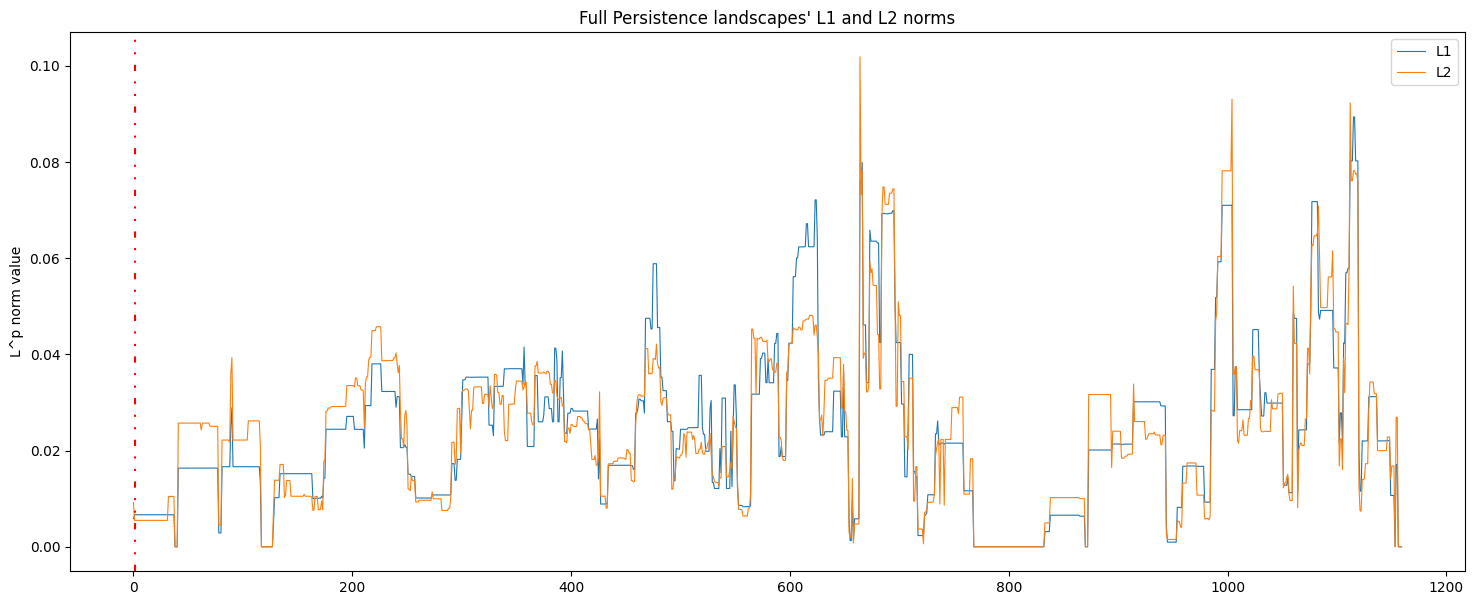

In [45]:
# Computes and print graph of dot-com bubble
df = pd.DataFrame(norms,
                  columns=["L1", "L2"])

ax = df.plot(figsize=(20, 8),
             lw=0.8,
             title="Persistence landscapes' L1 and L2 ")

ax.axvline(x=1.06,
           color='r',
           linestyle=(0, (3, 5, 1, 5, 1, 5)))
ax.legend()
plt.show()

# Computes the full L1 and L2 time series plot
df = pd.DataFrame(norms,
                  columns=["L1", "L2"])

ax = df.plot(figsize=(18, 7),
             lw=0.8,
             ylabel="L^p norm value",
             title="Full Persistence landscapes' L1 and L2 norms")
ax.axvline(x=1.06,
           color='r',
           linestyle=(0, (3, 5, 1, 5, 1, 5)))
ax.legend();

### C) Detecting DotCom Bubble and 2008's Crisis

In [46]:
indices = {
    "S&P500": "^GSPC",
    "Dow Jones": "^DJI",
    "NASDAQ": "^IXIC",
    "Russell 2000": "^RUT"}

start_date = "1996-06-01"
end_date = "2009-12-31"

In [47]:
financial_dataset = FinancialData()
data = financial_dataset.generate_data(indices, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


100%|██████████| 5/5 [00:00<00:00, 623.58it/s]


In [48]:
params_bubble = {'data': data,
          'k_homology_dimension': 1,
          'm_landscape': 5,
          'n_nodes': 1000,
          'memory_saving': (True, 1)
          }

Ws = [30, 40, 50]
w = 40

d1, l1, norms = financial_dataset.compute_landscapes(w_window_size=w, **params_bubble)

Diagram Progress: 100%|██████████| 3379/3379 [00:12<00:00, 272.93it/s]


Call


Landscapes Progress: 100%|██████████| 3379/3379 [00:03<00:00, 976.36it/s] 


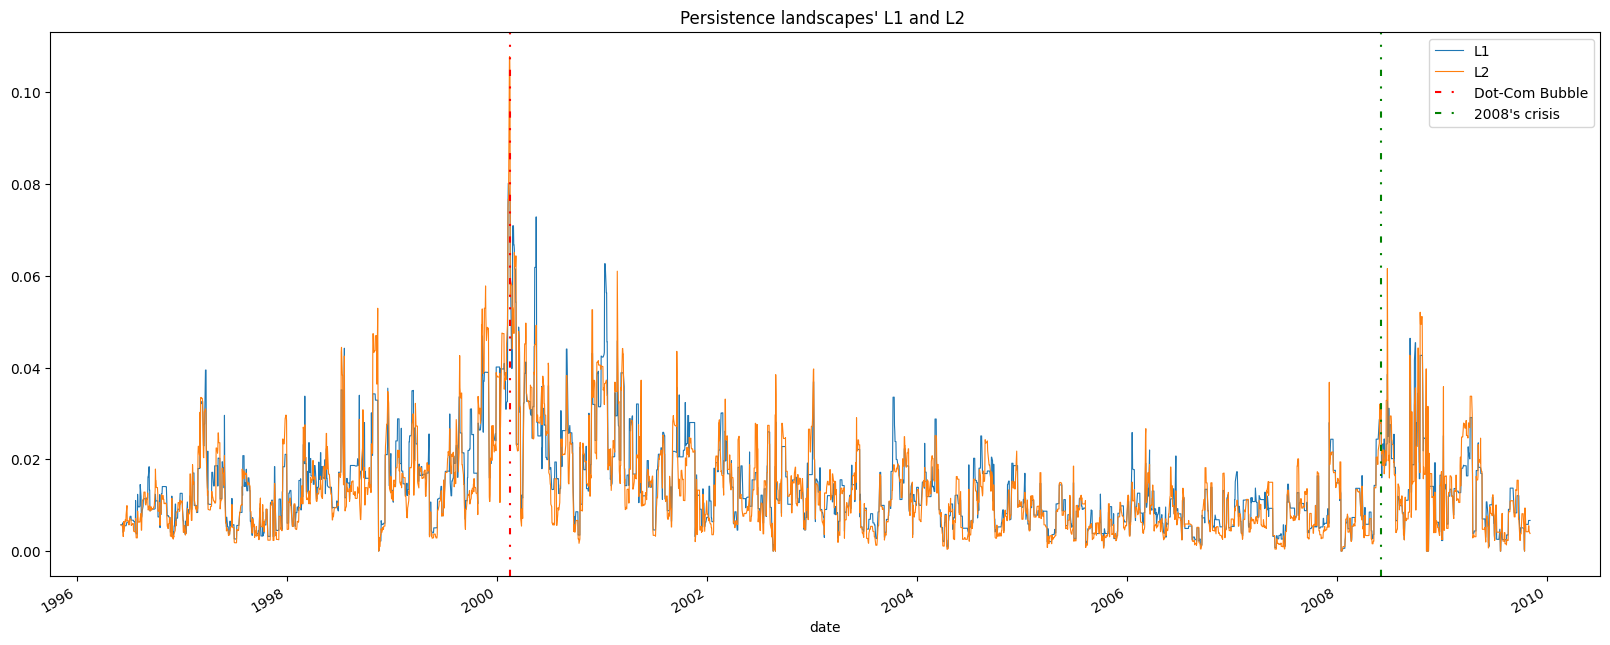

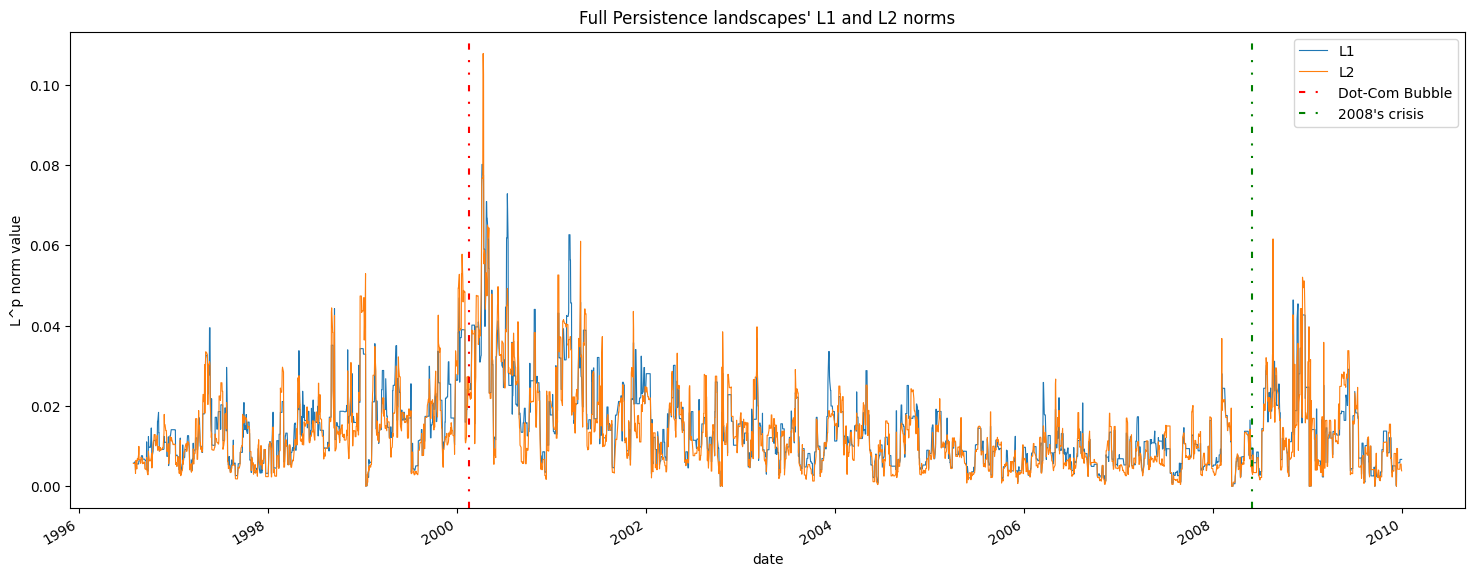

In [49]:
# Computes and print graph of dot-com bubble
df = pd.DataFrame(norms,
                  columns=["L1", "L2"],
                  index=data.index[:-w])

ax = df.plot(figsize=(20, 8),
             lw=0.8,
             title="Persistence landscapes' L1 and L2 ")

ax.axvline(x='2000-02-15',
           color='r',
           linestyle=(0, (3, 5, 1, 5, 1, 5)),
           label='Dot-Com Bubble')
ax.axvline(x='2008-06-01',
           color='g',
           linestyle=(0, (3, 5, 1, 5, 1, 5)),
           label="2008's crisis")
ax.legend()
plt.show()

# Computes the full L1 and L2 time series plot
df = pd.DataFrame(norms,
                  columns=["L1", "L2"],
                  index=data.index[w:])

ax = df.plot(figsize=(18, 7),
             lw=0.8,
             ylabel="L^p norm value",
             title="Full Persistence landscapes' L1 and L2 norms")
ax.axvline(x='2000-02-15',
           color='r',
           linestyle=(0, (3, 5, 1, 5, 1, 5)),
           label='Dot-Com Bubble')
ax.axvline(x='2008-06-01',
           color='g',
           linestyle=(0, (3, 5, 1, 5, 1, 5)),
           label="2008's crisis")
ax.legend();

## 2. Application of the method to new data

### A) Financial data from COVID period

In [50]:
indices = {
    "FTSE_100": "^FTSE",
    "CAC_40": "^FCHI",
    "DAX": "^GDAXI",
    "IBEX_35": "^IBEX"
}

start_date = "2019-01-01"  # Date de début avant le COVID-19
end_date = "2023-12-31"    # Date de fin actuelle

In [51]:
financial_dataset = FinancialData()
data = financial_dataset.generate_data(indices, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


100%|██████████| 5/5 [00:00<00:00, 598.23it/s]


In [52]:
params = {'data': data,
          'k_homology_dimension': 1,
          'm_landscape': 5,
          'n_nodes': 1000,
          'memory_saving': (True, 1)
          }

Ws = [30, 40, 50]
w = 40

d1, l1, norms = financial_dataset.compute_landscapes(w_window_size=w, **params)

Diagram Progress: 100%|██████████| 1213/1213 [00:04<00:00, 269.76it/s]


Call


Landscapes Progress: 100%|██████████| 1213/1213 [00:01<00:00, 791.83it/s]


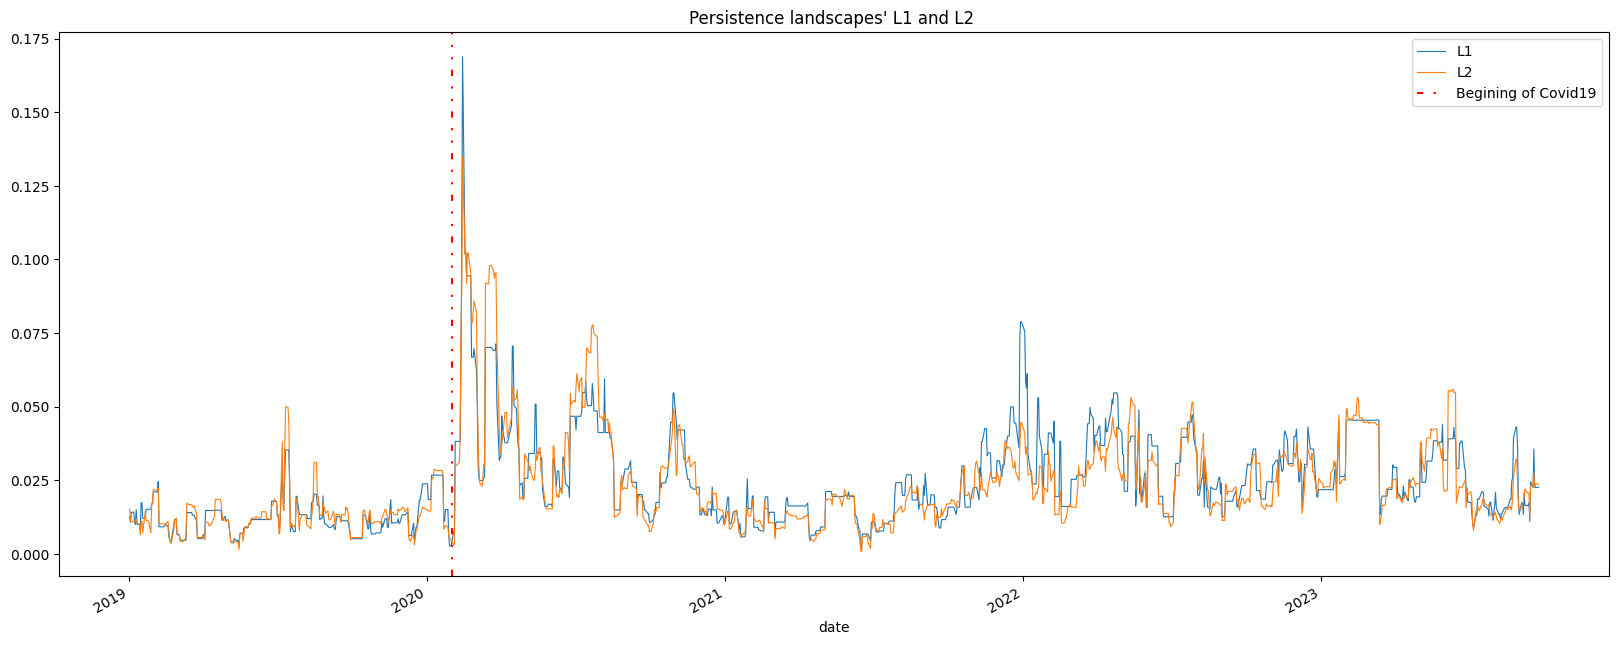

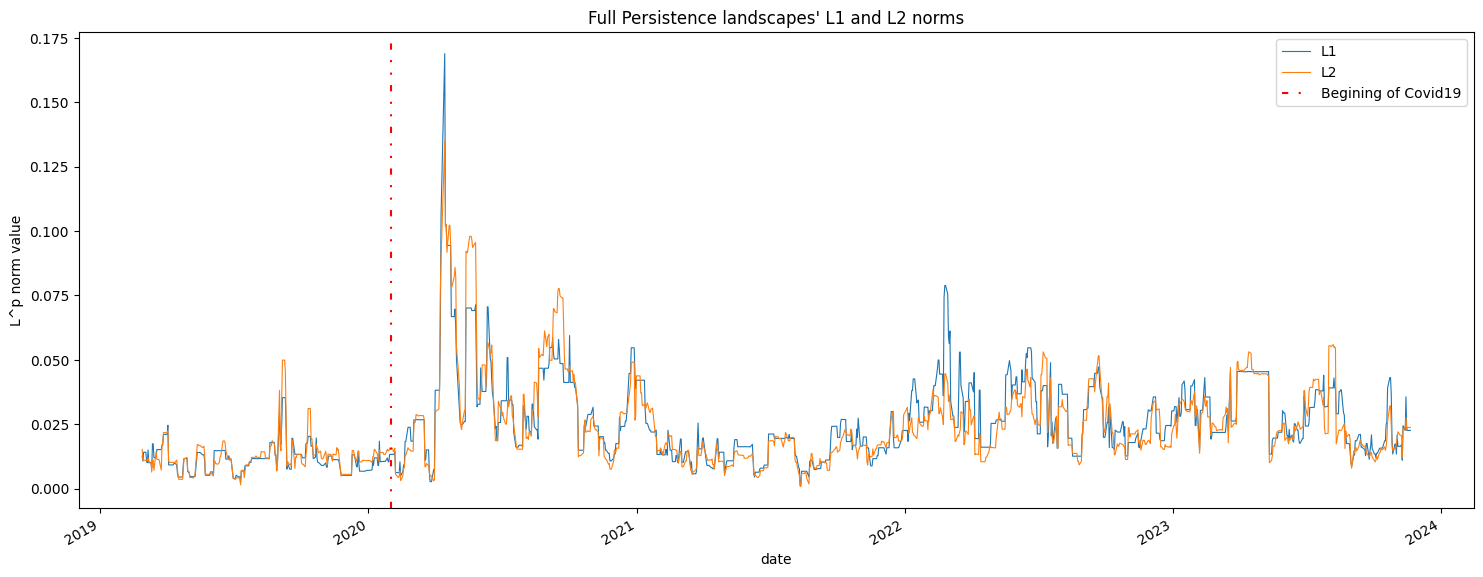

In [53]:
# Computes and print graph of dot-com bubble
df = pd.DataFrame(norms,
                columns = ["L1", "L2"],
                index   = data.index[:-w])
ax = df.plot(figsize = (20, 8),
            lw       = 0.8,
            title    = "Persistence landscapes' L1 and L2 ")
ax.axvline(x         = '2020-02-01',
        color     = 'r',
        linestyle = (0, (3, 5, 1, 5, 1, 5)),
        label     = 'Begining of Covid19')
ax.legend()
plt.show()
# Computes the full L1 and L2 time series plot
df = pd.DataFrame(norms,
                columns  = ["L1", "L2"],
                index    = data.index[w:])
ax = df.plot(figsize = (18, 7),
            lw      = 0.8,
            ylabel  = "L^p norm value",
            title   = "Full Persistence landscapes' L1 and L2 norms")
ax.axvline(x         = '2020-02-01',
        color     = 'r',
        linestyle = (0, (3, 5, 1, 5, 1, 5)),
        label     = 'Begining of Covid19')
ax.legend();

### B) Crypto data

In [54]:
indices_crypto = ['BTC/USDT', 'ETH/USDT', 'ADA/USDT', 'SOL/USDT']
start_date = "2019-01-01"  # Date de début avant le COVID-19
end_date = "2023-12-31"    # Date de fin actuelle

In [56]:
crypto_dataset = CryptoData()
data = crypto_dataset.generate_data(indices_crypto, start_date, end_date)

In [57]:
params_crypto = {'data': data,
          'k_homology_dimension': 1,
          'm_landscape': 5,
          'n_nodes': 1000,
          'memory_saving': (True, 1)
          }

w = 30

d1, l1, norms = crypto_dataset.compute_landscapes(w_window_size=w, **params_crypto)

Diagram Progress: 100%|██████████| 470/470 [00:00<00:00, 640.38it/s]


Call


Landscapes Progress: 100%|██████████| 470/470 [00:00<00:00, 4311.62it/s]


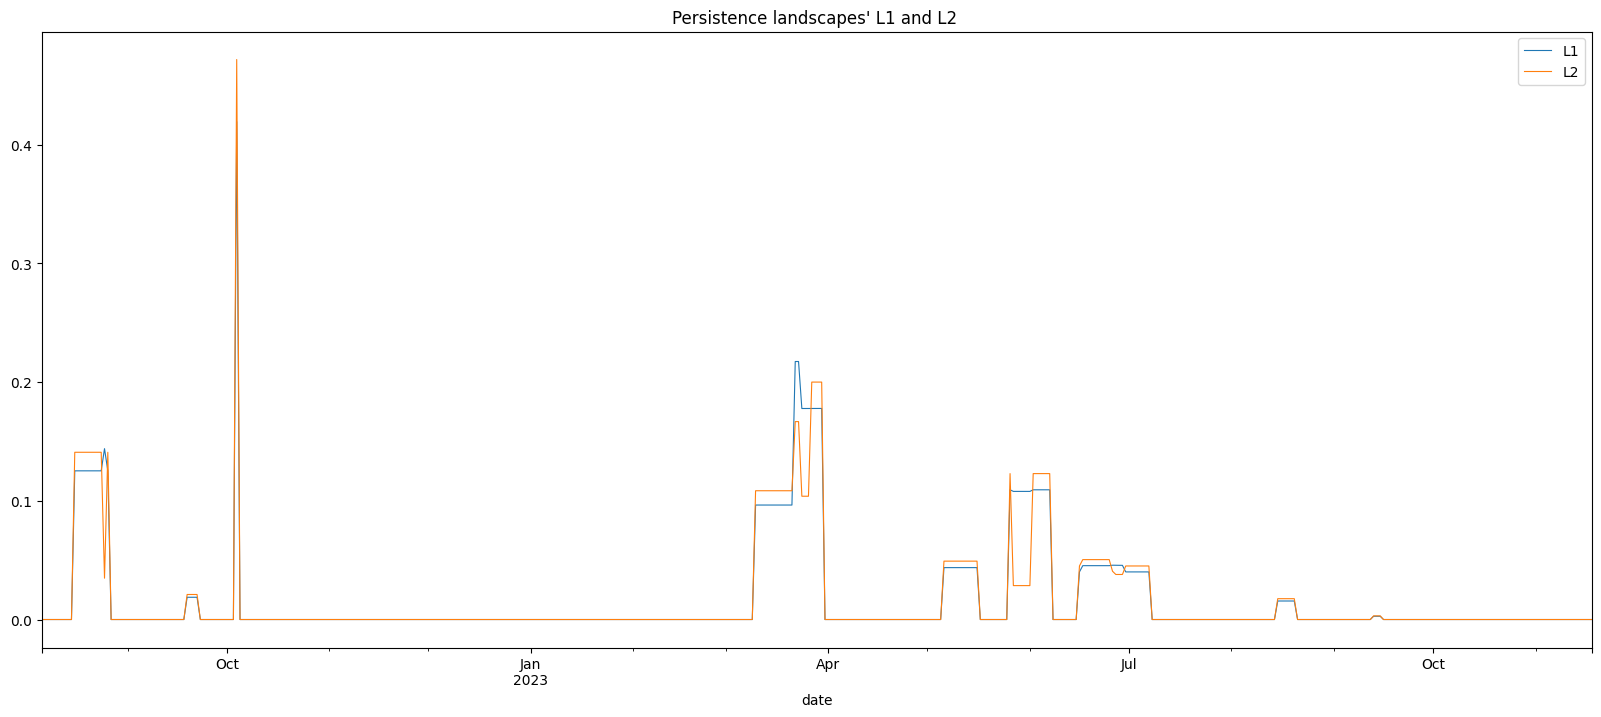

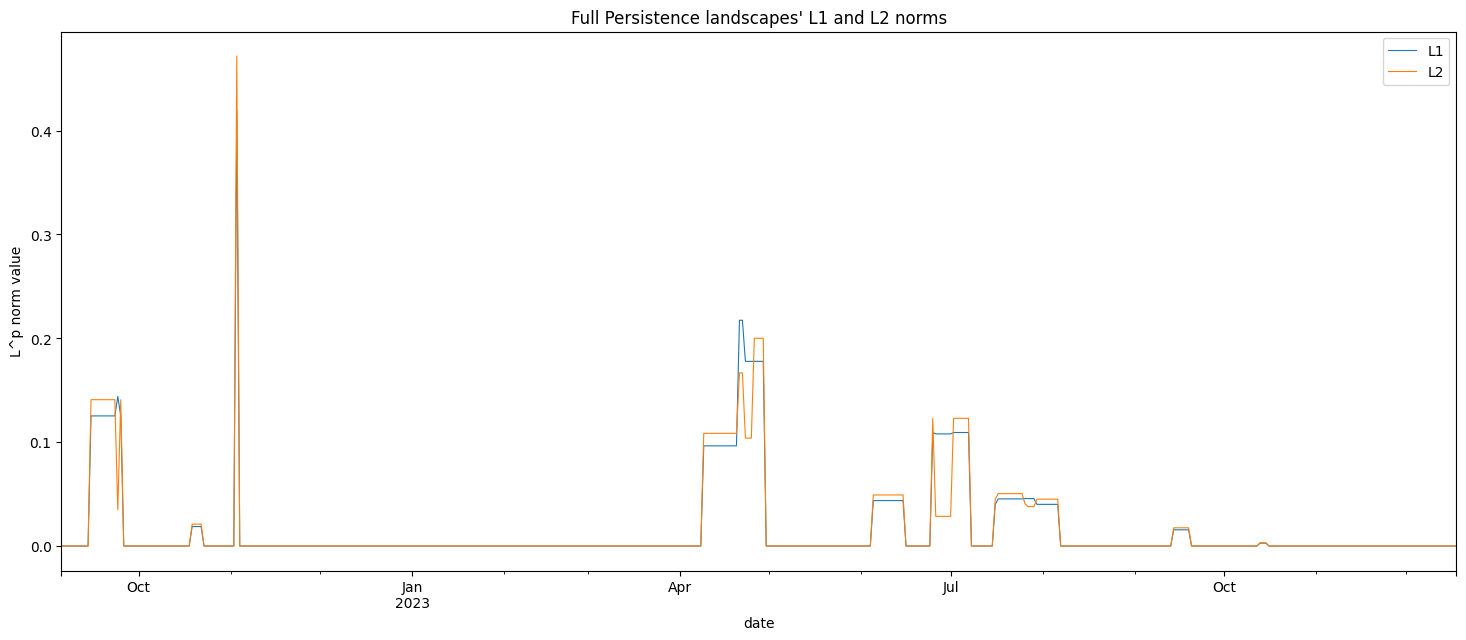

In [58]:
# Computes and print graph of dot-com bubble
df = pd.DataFrame(norms,
                columns = ["L1", "L2"],
                index   = data.index[:-w])
ax = df.plot(figsize = (20, 8),
            lw       = 0.8,
            title    = "Persistence landscapes' L1 and L2 ")
ax.legend()
plt.show()
# Computes the full L1 and L2 time series plot
df = pd.DataFrame(norms,
                columns  = ["L1", "L2"],
                index    = data.index[w:])
ax = df.plot(figsize = (18, 7),
            lw      = 0.8,
            ylabel  = "L^p norm value",
            title   = "Full Persistence landscapes' L1 and L2 norms")
ax.legend();